In [31]:
import os
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

In [32]:
lead_times = [0,1,2,3,4,5,6,7,8,9]
experiment_name = "SIC_Attention_Res_UNet"
benchmark_forecasts = ["Persistence", "Anomaly_persistence", "TOPAZ", "TOPAZ_bias_corrected"]
#
date_min = "20210101"
date_max = "20211231"
period = date_min + "_" + date_max
#
path_output = "/lustre/storeB/users/cyrilp/COSI/Figures/Article/" 
if os.path.isdir(path_output) == False:
    os.system("mkdir -p " + path_output)
#
sizefont = 25
sizefont_legend = 20
linewidth = 3
alpha = 1
colors = ["black", "dodgerblue", "indianred", "darkkhaki"]
bar_width = 0.175

In [33]:
def read_dataset(experiment_name, benchmark_forecasts, period, lead_times):    
    #
    Frac_improved_RMSE = {}
    Frac_improved_IIEElength15 = {}
    #
    for bf in benchmark_forecasts:
        Frac_improved_RMSE[bf] = np.full(len(lead_times), np.nan)
        Frac_improved_IIEElength15[bf] = np.full(len(lead_times), np.nan)
    #
    for lt, leadtime in enumerate(lead_times):
        path_exp = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/" + experiment_name + "/lead_time_" + str(leadtime) + "_days/scores/"
        df = pd.read_csv(path_exp + "Scores_" + period + ".txt", delimiter = "\t")
        for bf in benchmark_forecasts:
            Frac_improved_RMSE[bf][lt] = 100 * np.sum(df["RMSE_ML"] < df["RMSE_" + bf]) / len(df["RMSE_ML"])
            Frac_improved_IIEElength15[bf][lt] = 100 * np.sum(df["IIEElength_15_ML"] < df["IIEElength_15_" + bf]) / len(df["IIEElength_15_ML"])
    #
    return(Frac_improved_RMSE, Frac_improved_IIEElength15)

In [34]:
def make_figure(Frac_improved_RMSE, Frac_improved_IIEElength15, saving = False):
    #
    lead_times_fig = np.array(lead_times) + 1
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 2, figsize = (25, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(121)
    for i, bf in enumerate(benchmark_forecasts):
        label_str = bf.replace("TOPAZ", "TOPAZ4").replace("_", " ")
        lead_times_i = lead_times_fig - 2* bar_width + i * bar_width
        l = ax.bar(lead_times_i, Frac_improved_RMSE[bf], color = colors[i], label = label_str, width = bar_width, alpha = alpha)
    ax.set_title("RMSE", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Fraction of forecasts outperforming  \n the benchmark forecasts (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.set_ylim([96, 100.05])
    ax.set_xticks(ticks = lead_times_fig, labels = lead_times_fig)
    ax.legend(fontsize = sizefont_legend, loc = "lower left", ncol = 1, framealpha = 1)
    ax.text(-0.15,-0.05, "a)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #
    ax = plt.subplot(122)
    for i, bf in enumerate(benchmark_forecasts):
        label_str = bf.replace("TOPAZ", "TOPAZ4").replace("_", " ")
        lead_times_i = lead_times_fig - 2* bar_width + i * bar_width
        l = ax.bar(lead_times_i, Frac_improved_IIEElength15[bf], color = colors[i], label = label_str, width = bar_width, alpha = alpha)
    ax.set_title("Ice edge distance error", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Fraction of forecasts outperforming \n the benchmark forecasts (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.set_xticks(ticks = lead_times_fig, labels = lead_times_fig)
    ax.set_ylim([86, 100.15])
    ax.text(-0.15,-0.05, "b)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #
    if saving == True:
        plt.savefig(path_output + "Fraction_of_forecasts_improved_" + experiment_name + "_" + date_min + "_" + date_max + ".png", bbox_inches = "tight")
    else:
        plt.show()

<Figure size 640x480 with 0 Axes>

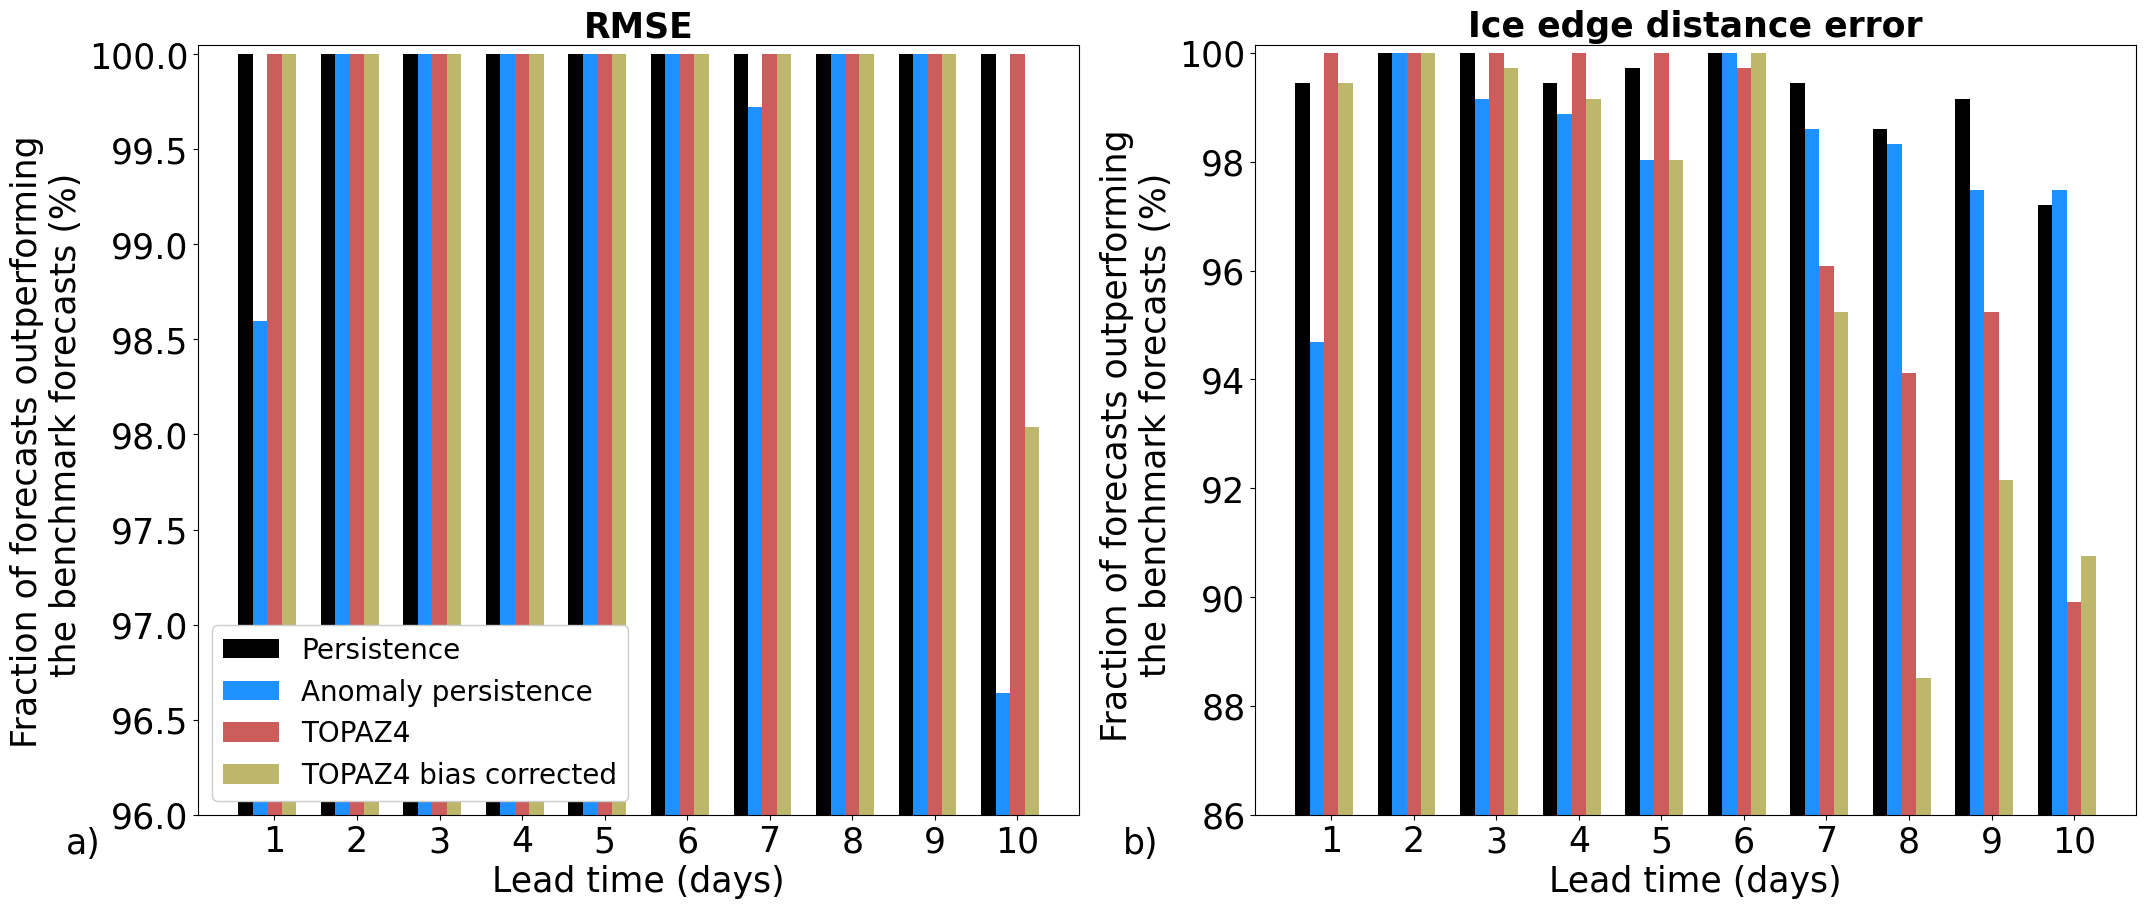

In [35]:
Frac_improved_RMSE, Frac_improved_IIEElength15 = read_dataset(experiment_name, benchmark_forecasts, period, lead_times)
make_figure(Frac_improved_RMSE, Frac_improved_IIEElength15, saving = True)

In [36]:
for key in Frac_improved_RMSE:
    print(key + "_RMSE", np.min(Frac_improved_RMSE[key]), np.max(Frac_improved_RMSE[key]), np.mean(Frac_improved_RMSE[key]))
    print(key + "_IIEElength 15 %", np.min(Frac_improved_IIEElength15[key]), np.max(Frac_improved_IIEElength15[key]), np.mean(Frac_improved_IIEElength15[key]))

Persistence_RMSE 100.0 100.0 100.0
Persistence_IIEElength 15 % 97.19887955182072 100.0 99.29971988795519
Anomaly_persistence_RMSE 96.63865546218487 100.0 99.49579831932773
Anomaly_persistence_IIEElength 15 % 94.67787114845939 100.0 98.26330532212887
TOPAZ_RMSE 100.0 100.0 100.0
TOPAZ_IIEElength 15 % 89.91596638655462 100.0 97.50700280112044
TOPAZ_bias_corrected_RMSE 98.03921568627452 100.0 99.80392156862744
TOPAZ_bias_corrected_IIEElength 15 % 88.51540616246498 100.0 96.30252100840336
